<a href="https://colab.research.google.com/github/Minyst/ML_DL_Portfolio_KR/blob/main/AI%20Cover/1_Youtube_Music_Splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Youtube Music Splitting

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Package Download

In [ ]:
!pip install -q yt_dlp
!pip install -q ffmpeg
!pip install -q demucs

## Import Packages

In [ ]:
from __future__ import unicode_literals
import os
import sys
import shutil
import yt_dlp
import ffmpeg
import demucs
import time

## Music Download & Split Music
#####split music - vocals and no vocals(MR,BGM)
#####Park Hyo Shin(박효신)
#####추억은 사랑을 닮아: https://youtu.be/KaOzQqE-fwQ?si=LfjlrQbyMFu8h5ck,
#####야생화: https://youtu.be/OxgiiyLp5pk?si=m-vMnP6ZyJMiGEs7,
#####눈의꽃: https://youtu.be/BY4sHNaV4WU?si=eFUJ2iGr6FzW2cVK,
#####Gift: https://youtu.be/haM03BYST8c?si=hxlvtp4ifWLHT3by,
#####동경: https://youtu.be/xdQZqb0glnI?si=ZFjrLHqYaI-icfhj




In [ ]:
base_dir = "/content/drive/MyDrive/AICover"
os.makedirs(base_dir, exist_ok=True)
dir_name = "PHS"
os.makedirs(f"{base_dir}/{dir_name}", exist_ok=True)

youtube_url = [
    "https://youtu.be/KaOzQqE-fwQ?si=LfjlrQbyMFu8h5ck",
    "https://youtu.be/OxgiiyLp5pk?si=m-vMnP6ZyJMiGEs7",
    "https://youtu.be/BY4sHNaV4WU?si=eFUJ2iGr6FzW2cVK",
    "https://youtu.be/haM03BYST8c?si=hxlvtp4ifWLHT3by",
    "https://youtu.be/xdQZqb0glnI?si=ZFjrLHqYaI-icfhj"
]

music = ["추억은사랑을닮아", "야생화", "눈의꽃", "Gift", "동경"]

for i, link in enumerate(youtube_url):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
        }],
        "outtmpl": f'{base_dir}/{dir_name}/{music[i]}',
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([link])

    audio_url = f"{base_dir}/{dir_name}/{music[i]}.wav"

    !demucs --two-stems=vocals {audio_url}
    # music_name = music[i]
    # !mv /content/separated/htdemucs/{music_name} {base_dir}/{dir_name}

In [ ]:
!mv /content/separated/htdemucs/* {base_dir}/{dir_name}

In [ ]:
!cp -r /content/separated/htdemucs/* {base_dir}/{dir_name}

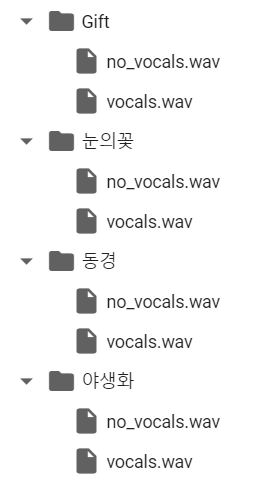

## Principle of Demucs
https://github.com/facebookresearch/demucs


![](https://raw.githubusercontent.com/facebookresearch/demucs/main/demucs.png)